# **Setting & Introduction**

## **1. Github 연동**

In [1]:
""" github 연동 """
# !git clone https://github.com/ku-sungsukim/2024-LGElec-Day2.git ### colab 사용시

' github 연동 '

## **2. 조교소개**

In [2]:
# !pip install IPython ### 특정 패키지 설치 시 활용
from IPython.display import Image

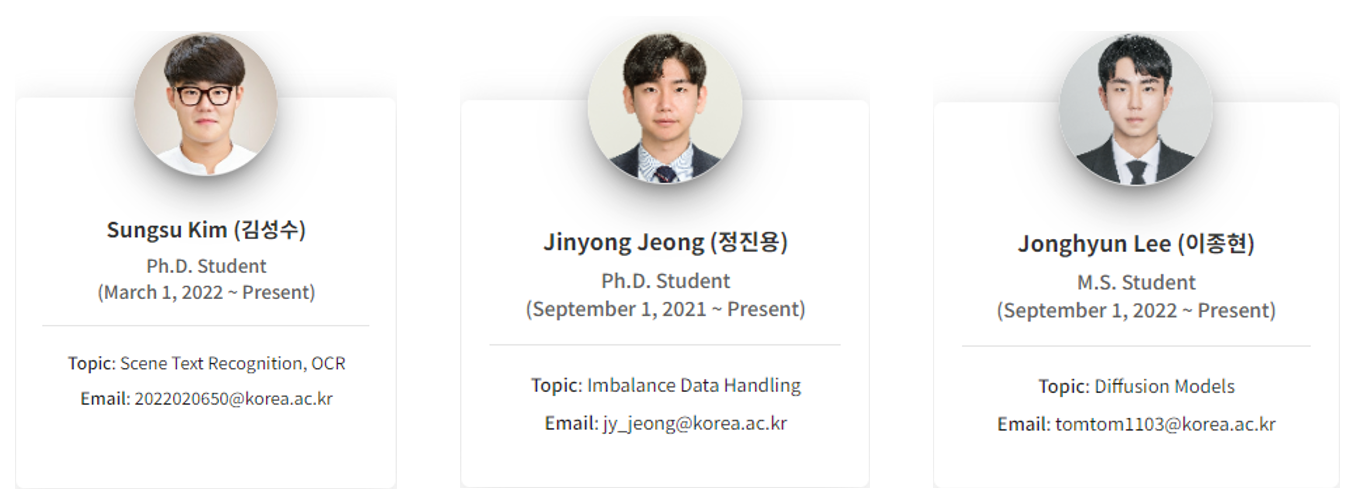

In [3]:
""" 설명 장표 불러오기 """
Image('image/image1.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image1.PNG') ### colab 사용시

## **3. About Jupyter Notebook**

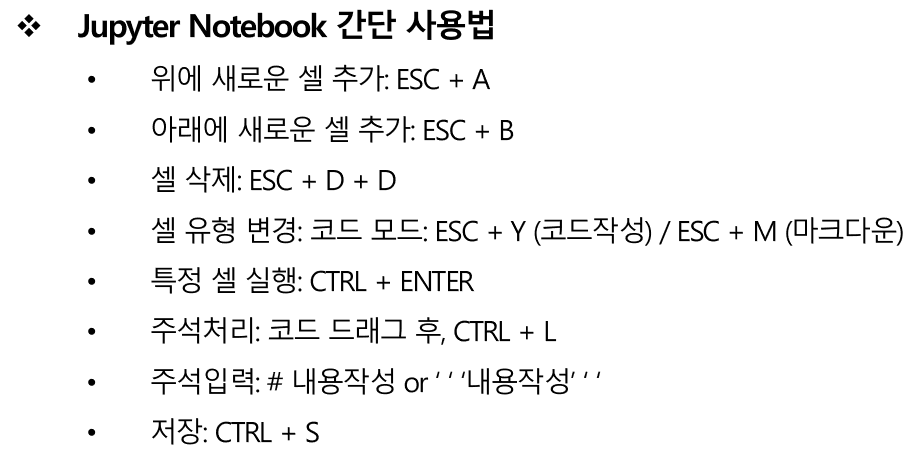

In [4]:
""" 설명 장표 불러오기 """
Image('image/image2.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image2.PNG') ### colab 사용시

## **4. 강의목차**

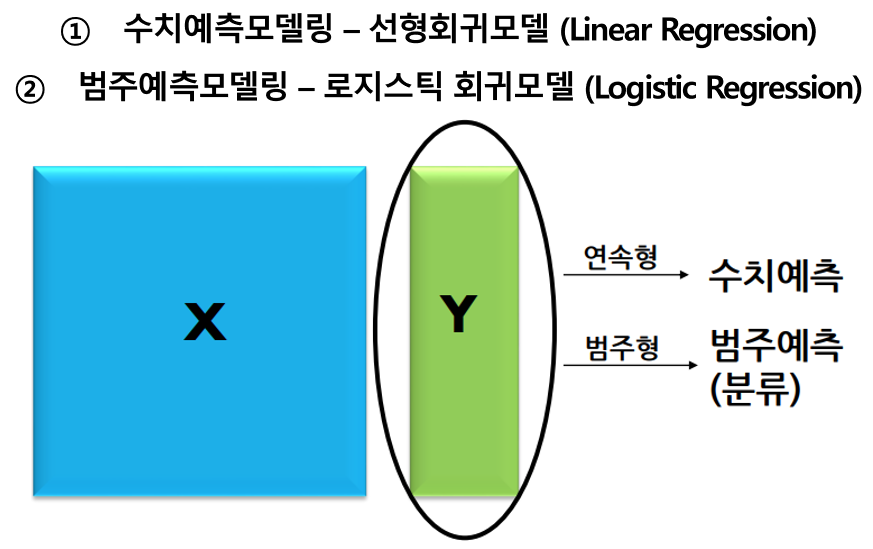

In [5]:
""" 설명 장표 불러오기 """
Image('image/image3.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image3.PNG') ### colab 사용시

# **실습**

#### **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 데이터 개요 파악

 - 탐색적 데이터 분석

#### **2. 데이터 분할**

#### **3. 모델링**
 - 선형회귀모델 수립

 - 선형회귀모델 가정 충족여부 확인

 - 모델 결과해석

 - 모델 평가 (여러 지표 활용)

#### **Appendix. statsmodels VS sklearn**
 - 특징 비교 및 성능 비교

## **0. 필요 패키지 불러오기**

In [6]:
"""
패키지 불러오기

style1: import warnings
 - warnings 패키지를 불러온다.
 
style2: import pandas as pd
 - pandas 패키지를 불러온다. 또한 추후 pandas를 pd로 줄여서 활용하겠다.
 
style3: from sklearn.linear_model import LinearRegression
 - sklearn.linear_model에서 LinearRegression 함수를 불러온다.
"""


""" 데이터 전처리 관련 패키지 """
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing


""" 기계학습 모델 구축 및 평가 패키지 """
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


""" 데이터 시각화 패키지 """
import seaborn as sns
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석데이터: 1990년 캘리포니아 주택 데이터 (https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ko)

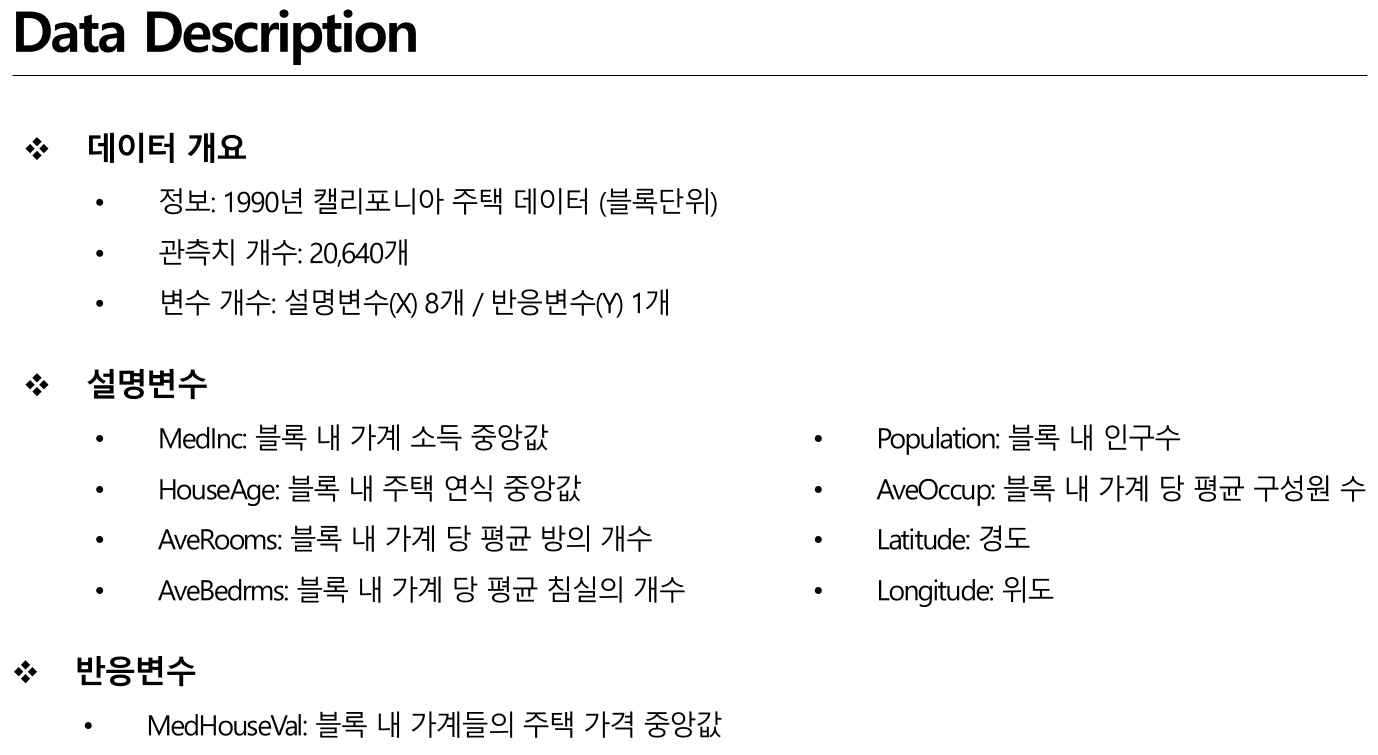

In [7]:
""" 설명 장표 불러오기 """
Image('image/image4.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image4.PNG') ### colab 사용시

#### **1-1. 데이터 불러오기 및 개요 파악**

In [8]:
""" 데이터 불러오기 """
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
""" 데이터 개요 확인 """
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
""" X변수 실제값 확인 """
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
""" X변수명 확인"""
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
""" X변수 크기 확인"""
california.data.shape

(20640, 8)

In [13]:
""" Y변수 실제값 확인 """
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
""" Y변수 크기 확인 """
california.target.shape

(20640,)

In [15]:
""" X, Y 데이터프레임화 """
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['MedHouseVal'])

In [16]:
""" X값 일부 확인 """
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
""" y값 일부 확인 """
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


#### **1-2. 탐색적 데이터 분석**

In [18]:
""" X와 Y를 Index에 맞게 병합 """
data = pd.concat([X, y], axis=1) ### axis=0: 행단위 병합 / axis=1: 열단위 병합
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [19]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
""" 각 변수별 통계량 확인 """
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


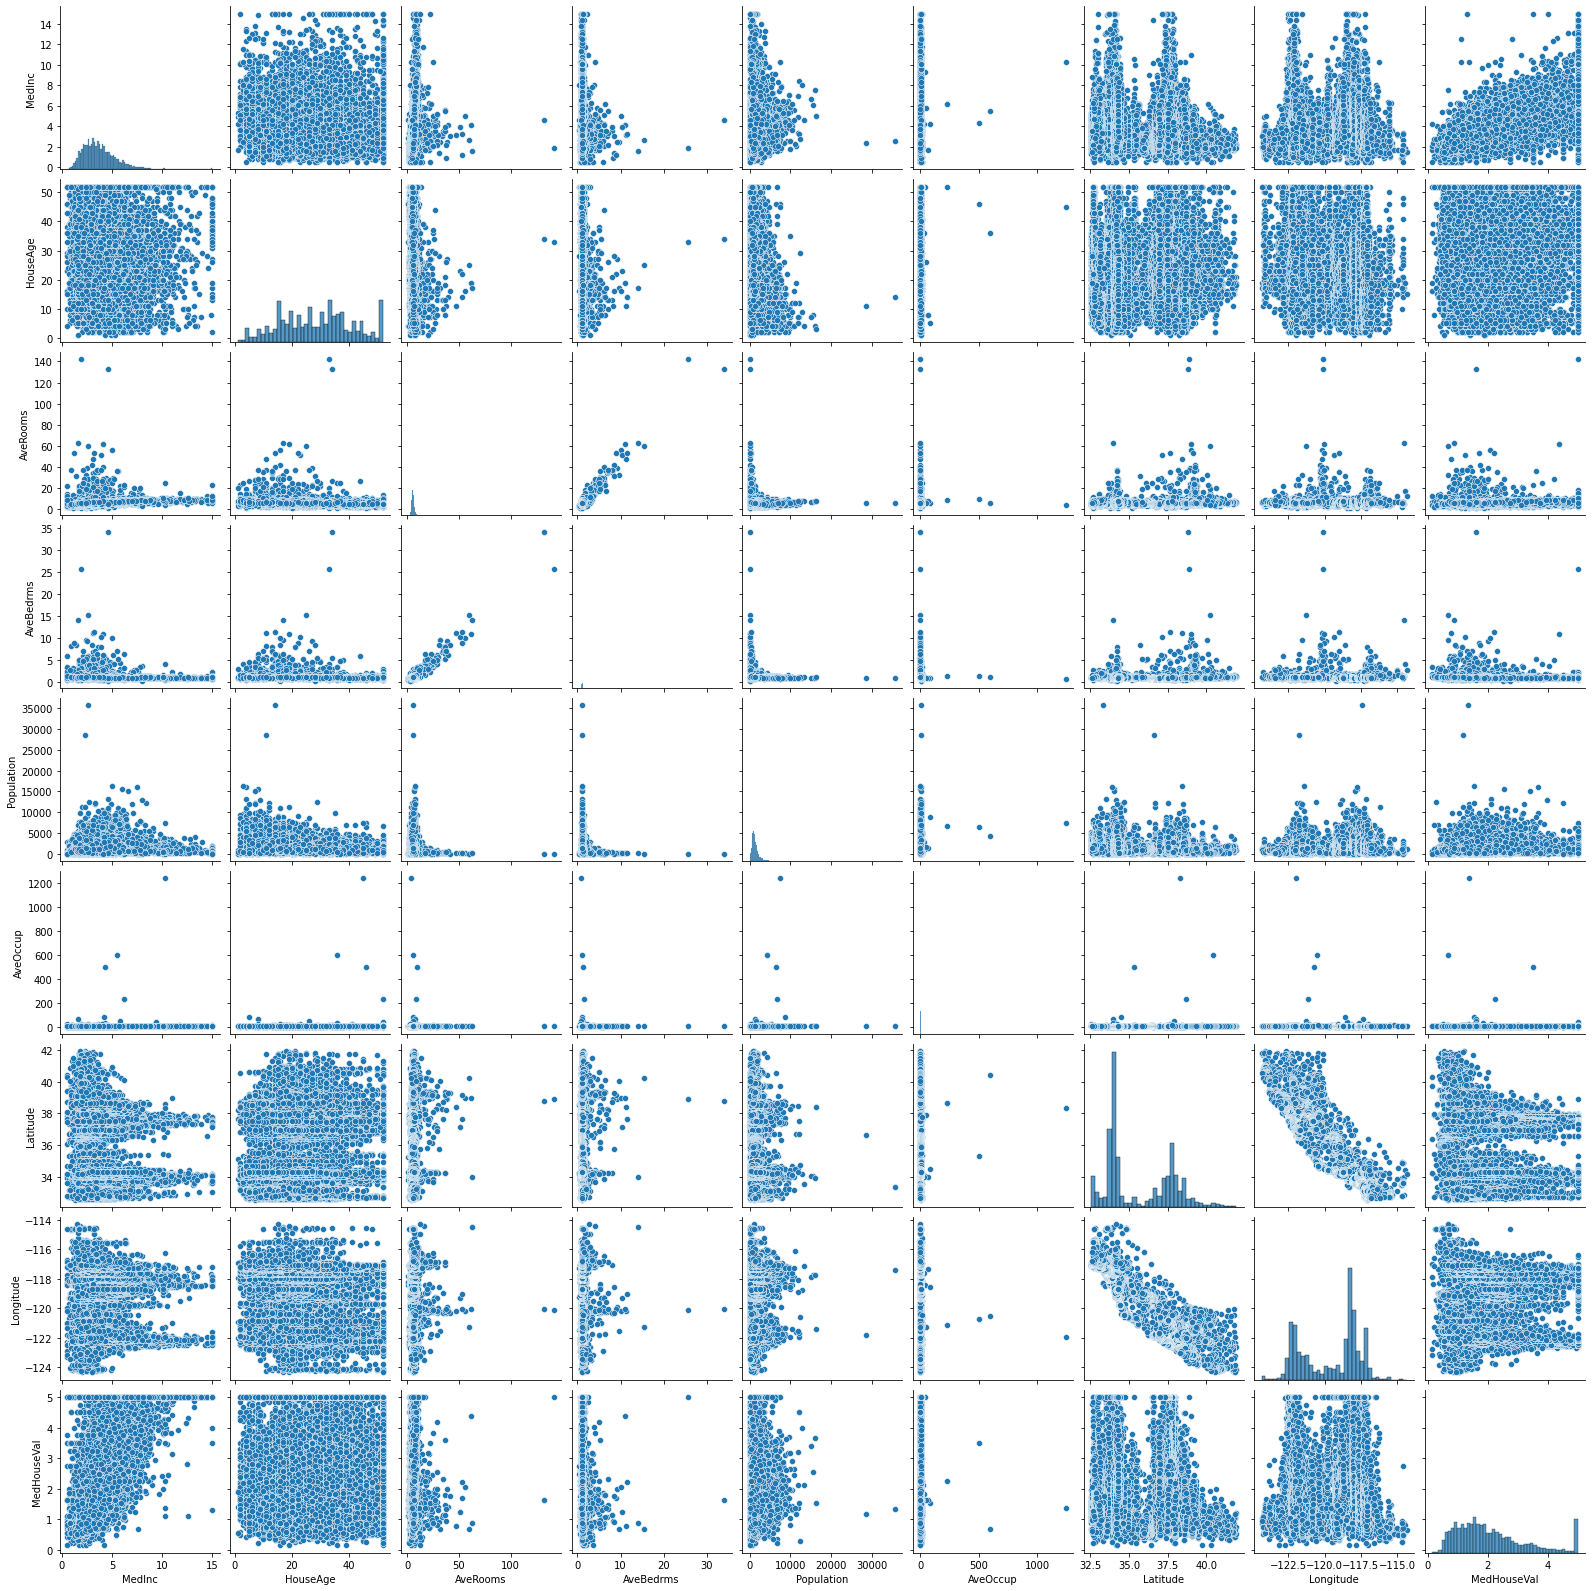

In [21]:
""" 각 변수 간 관계성 시각화 (pairplot) """

"""
pairplot 내 정보
 1) 산점도: 각 변수 간 관계성 파악 (비대각성분)
 2) 히스토그램: 각 변수 내 분포 파악 (대각성분)
"""

sns.pairplot(data)
plt.show()

<Figure size 720x720 with 0 Axes>

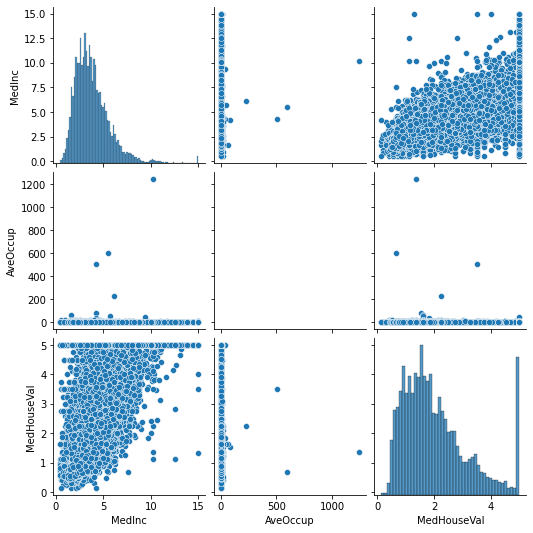

In [22]:
""" 특정 변수 간 관계성 시각화 (pairplot) """
plt.figure(figsize=(10, 10)) ### 이미지 크기 설정
sns.pairplot(data[['MedInc', 'AveOccup', 'MedHouseVal']]) ### 특정변수 필터링
plt.show()

In [23]:
""" 변수 별 상관관계 확인 """
data.corr() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


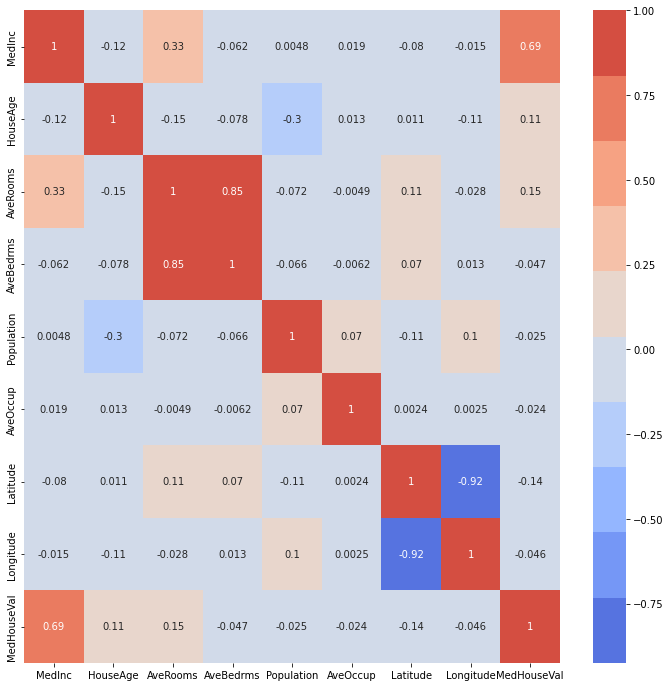

In [24]:
""" 상관관계 시각화 """
plt.figure(figsize=(12, 12))
sns.heatmap(
    data.corr(), 
    cmap=sns.color_palette("coolwarm", 10), ### 팔레트 색깔 설정
    annot=data.corr() ### 히트맵 내 표시할 값
    ) 
plt.show()

## **2. 데이터 분할**

In [25]:
""" 학습데이터와 평가데이터 분할 """

"""
학습데이터(80%)와 평가데이터(20%)를 구분
 - test_size: 분할 비율 설정
 - random_state: 랜덤성 제어
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2024) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [26]:
""" X변수들의 학습데이터 형태 확인 """
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3032,4.4561,12.0,6.094875,1.026172,3018.0,3.291167,35.41,-119.12
20195,3.4450,8.0,4.784124,1.135528,3012.0,2.915779,34.27,-119.20
16166,3.7167,46.0,4.699822,1.078153,1418.0,2.518650,37.78,-122.50
10695,3.7422,16.0,5.042125,1.054945,857.0,1.569597,33.61,-117.74
7440,3.5125,44.0,4.602606,0.970684,1200.0,3.908795,33.94,-118.20


In [27]:
""" Y변수들의 학습데이터 형태 확인 """
y_train.head()

,MedHouseVal
3032,0.969
20195,2.034
16166,3.328
10695,2.298
7440,1.693


## **3. 모델링**
 - statsmodels 패키지의 OLS를 사용하여 선형회귀분석 수행
 
 
 * OLS(Ordinary Least Squares): 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β0, β1, β2 ...) 구하는 방법

#### **3-1. 모델 학습 (파라미터 도출)**

In [28]:
""" 회귀분석의 상수항(β0) 추가 """
X_train = sm.add_constant(X_train)
X_train.head() 

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3032,1.0,4.4561,12.0,6.094875,1.026172,3018.0,3.291167,35.41,-119.12
20195,1.0,3.4450,8.0,4.784124,1.135528,3012.0,2.915779,34.27,-119.20
16166,1.0,3.7167,46.0,4.699822,1.078153,1418.0,2.518650,37.78,-122.50
10695,1.0,3.7422,16.0,5.042125,1.054945,857.0,1.569597,33.61,-117.74
7440,1.0,3.5125,44.0,4.602606,0.970684,1200.0,3.908795,33.94,-118.20


In [29]:
""" 파라미터(β0, β1, β2 .. ) 연산 """
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

#### **3-2. 선형회귀 모델의 가정 충족여부 확인**

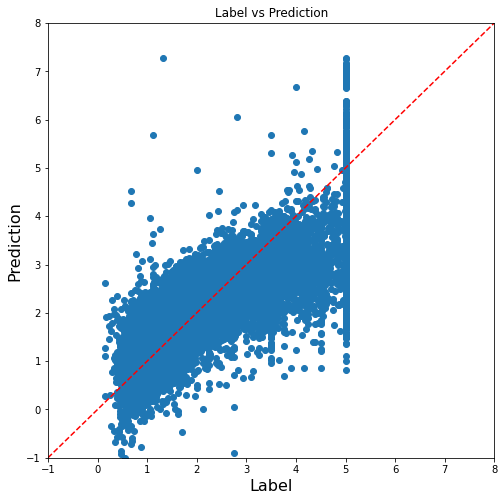

In [30]:
""" train 데이터의 예측 결과 비교 """

"""
X축: 실제 train_y값
Y축: train_x에 대한 예측값
 - y=x위에 있을수록 잘 예측한 것으로 해석 가능
"""

y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8)) ### 이미지 크기 정의

plt.scatter(y_train, y_train_pred) ### 산점도 그리기 (X, y)
plt.plot([-1, 8], [-1, 8], ls="--", c='red') ### y=x 그래프 그리기

plt.title('Label vs Prediction') ### figure title 정의
plt.xlabel('Label', size=16) ### x축 title 정의
plt.ylabel('Prediction', size=16) 

plt.xlim(-1, 8) ### x축 범위
plt.ylim(-1, 8) 

plt.show()

In [31]:
""" 오차 값 확인 """
model_residuals = model_trained.resid
model_residuals

3032    -0.953082
20195   -0.160681
16166    0.708679
10695    0.335819
7440    -0.483885
           ...   
14875   -0.279658
2688    -0.359997
19040   -0.369299
19962    0.305412
7816     0.710497
Length: 16512, dtype: float64

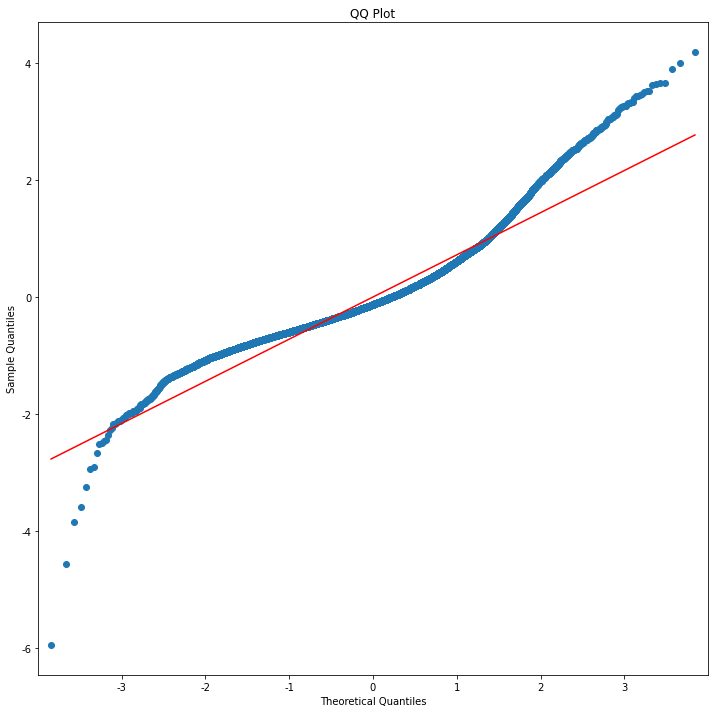

In [32]:
""" 오차의 정규성 확인 """

"""
QQ-plot: 실제 오차 값(Y축) / 실제 오차 값들의 표준 정규화 값 (X축)
 - y=x 그래프와 유사할수록 정규성을 띈다고 할 수 있다.
"""

plt.rcParams['axes.unicode_minus'] = False ### 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1) ### 이미지 및 Label 값 초기화
fig.set_figheight(12) ### 이미지 높이 정의
fig.set_figwidth(12) 

sm.ProbPlot(model_residuals).qqplot(line='s', ### 표준 정규분표 선 여부
                                    color='#1f77b4', 
                                    ax=ax) ### axis title 정의
ax.title.set_text('QQ Plot') ### figure title 정의

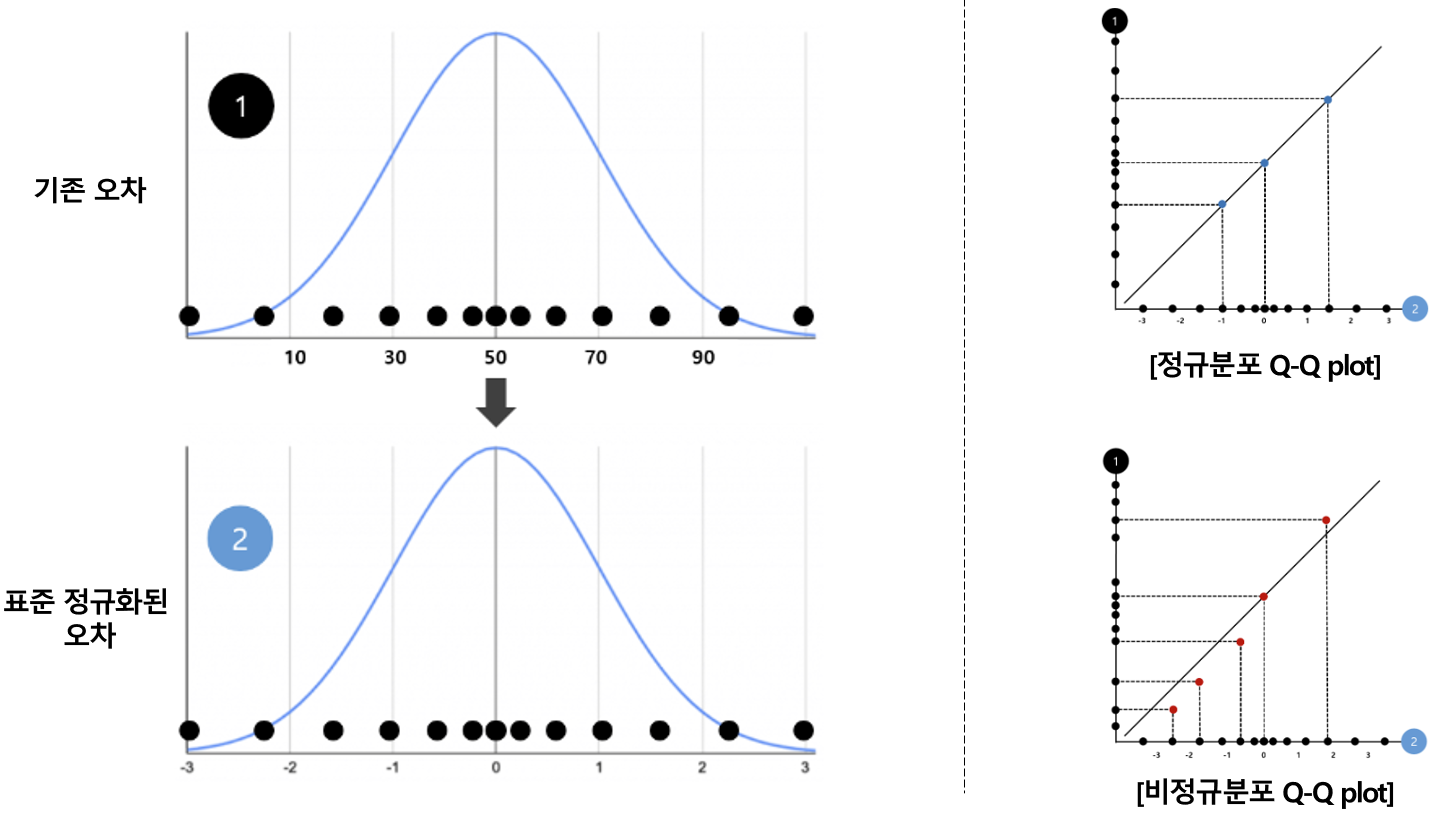

In [33]:
""" 설명 장표 불러오기 """
Image('image/image5.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image5.PNG') ### colab 사용시

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

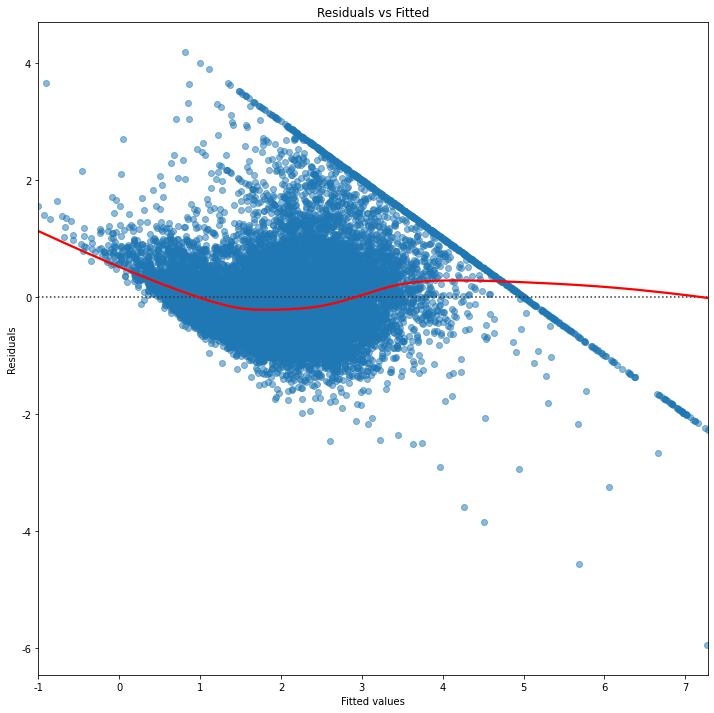

In [34]:
""" 오차의 등분산성 확인 """

"""
모델이 예측한 값 (X축) / 해당 예측값에 대한 오차 (Y축)
 - 특정 패턴을 찾아볼 수 없고, 무작위한 특징을 보인다면 등분산성 입증 가능
"""

model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sns.residplot(x=model_fitted_y, 
              y=y_train, 
              lowess=True, ### 추세선 표시
              scatter_kws={'alpha': 0.5}, ### alpha: 투명도
              line_kws={'color':'red'}, 
              ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

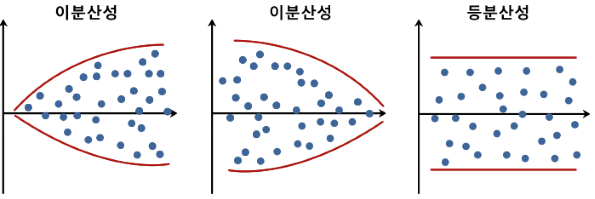

In [35]:
""" 설명 장표 불러오기 """
Image('image/image6.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image6.PNG') ### colab 사용시

#### **3-3. 모델 결과해석**

In [36]:
""" 모델 결과 해석 """

"""
 1) R-squared (R2 Score): 모델의 성능 지표 중 1개
 2) coef (회귀계수): 각 변수들의 회귀 계수 (=X가 한단위 증가할 때 Y의 변화량)
 3) P>[t] (p-value): 0.05(유의수준) 이하일 때 변수가 유의미
"""

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3189.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:12:13   Log-Likelihood:                -18022.
No. Observations:               16512   AIC:                         3.606e+04
Df Residuals:                   16503   BIC:                         3.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6058      0.740    -49.488      0.0

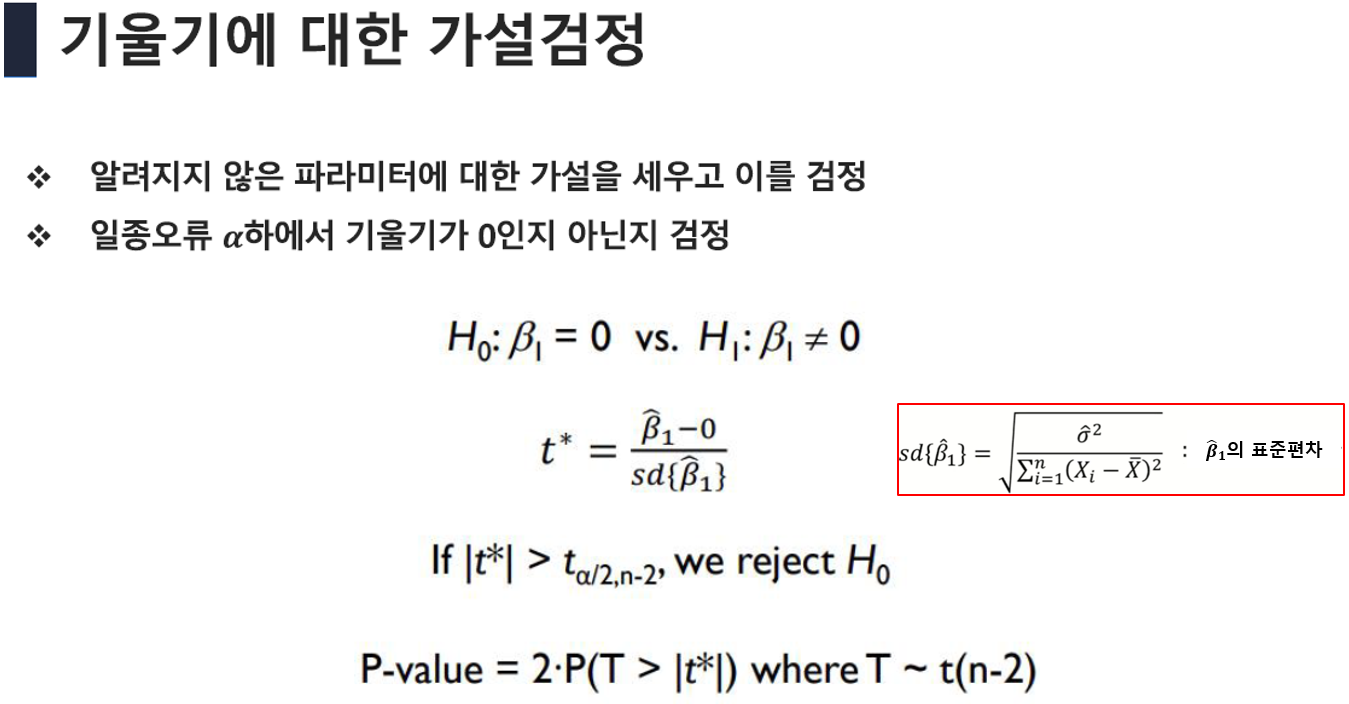

In [37]:
""" 설명 장표 불러오기 """
Image('image/image7.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image7.PNG') ### colab 사용시

In [38]:
""" 유의미하지 않은 변수 제거 후, 다시 모델링 """

"""
유의미하지 않은 변수 == p-value가 높은 변수 (Population)
 - Population: 블록 내 인구수
"""

X_train = X_train.drop(['Population'], axis=1)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3644.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:12:13   Log-Likelihood:                -18022.
No. Observations:               16512   AIC:                         3.606e+04
Df Residuals:                   16504   BIC:                         3.612e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6041      0.739    -49.522      0.0

#### **3-4. 모델평가**

In [39]:
""" 평가: 이전에 학습하지 않았던 데이터(test_y)로 모델 성능 평가 """

"""
train 데이터에 맞게 test 데이터도 전처리 수행
 - 상수항 추가
 - 유의미하지 않은 변수 제거
"""

X_test = sm.add_constant(X_test)
X_test = X_test.drop(['Population'], axis=1)
X_test.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
11730,1.0,3.6530,13.0,6.418197,1.181135,2.724541,38.98,-120.91
19197,1.0,3.9191,36.0,6.110063,1.059748,2.235849,38.45,-122.69
17032,1.0,4.5075,39.0,5.250986,1.042050,2.291721,37.51,-122.27
14827,1.0,1.6389,37.0,3.733333,1.000000,3.290909,32.66,-117.09
10577,1.0,4.9079,23.0,5.707510,1.027668,3.130435,33.63,-117.69


In [40]:
""" test_x의 예측값 계산 """
y_test_pred = model_trained.predict(X_test)
y_test_pred.head()

11730    0.940691
19197    2.215565
17032    2.820342
14827    1.455207
10577    2.413370
dtype: float64

Mean Squared Error (평균 제곱 오차): $\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$

In [41]:
""" 평가지표 산출(1): Mean Squared Error (평균 제곱 오차) """
print(mean_squared_error(y_test, y_test_pred))

0.5489389773970561


Root Mean Squared Error (제곱근 평균 제곱 오차): $\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [42]:
""" 평가지표 산출(2): Root Mean Squared Error (제곱근 평균 제곱 오차) """
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.7409041620864713


Mean Absolute Error (평균 절대 오차): $\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

In [43]:
""" 평가지표 산출(3): Mean Absolute Error (평균 절대 오차) """
print(mean_absolute_error(y_test, y_test_pred))

0.535031502595642


Mean Absolute Percentage Error (평균 절대 백분율 오차): $\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [44]:
""" 평가지표 산출(4): Mean Absolute Percentage Error (평균 절대 백분율 오차) """
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, pd.DataFrame(y_test_pred)))

31.47778331012959


In [45]:
""" 평가지표 산출(5): R2 Score (결정계수) """
print(r2_score(y_test, y_test_pred))

0.5986985466028097


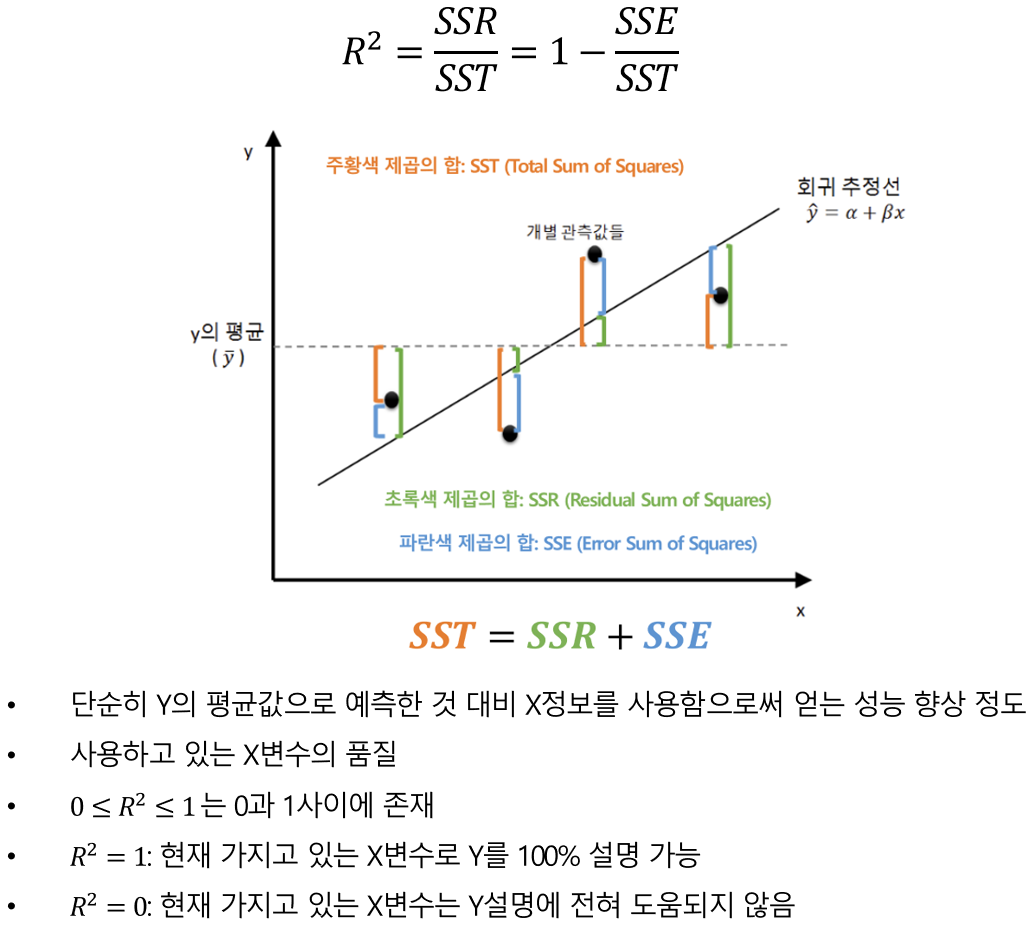

In [46]:
""" 설명 장표 불러오기 """
Image('image/image8.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image8.PNG') ### colab 사용시

In [47]:
""" 최종 결과 정리 """
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('==========================')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Training MSE: 0.519
Training RMSE: 0.721
Training MAE: 0.528


Training MAPE: 74.028
Training R2: 0.607
Testing MSE: 0.549
Testing RMSE: 0.741
Testing MAE: 0.535
Testing MAPE: 75.195
Testing R2: 0.599


## **Appendix. statsmodels VS sklearn**

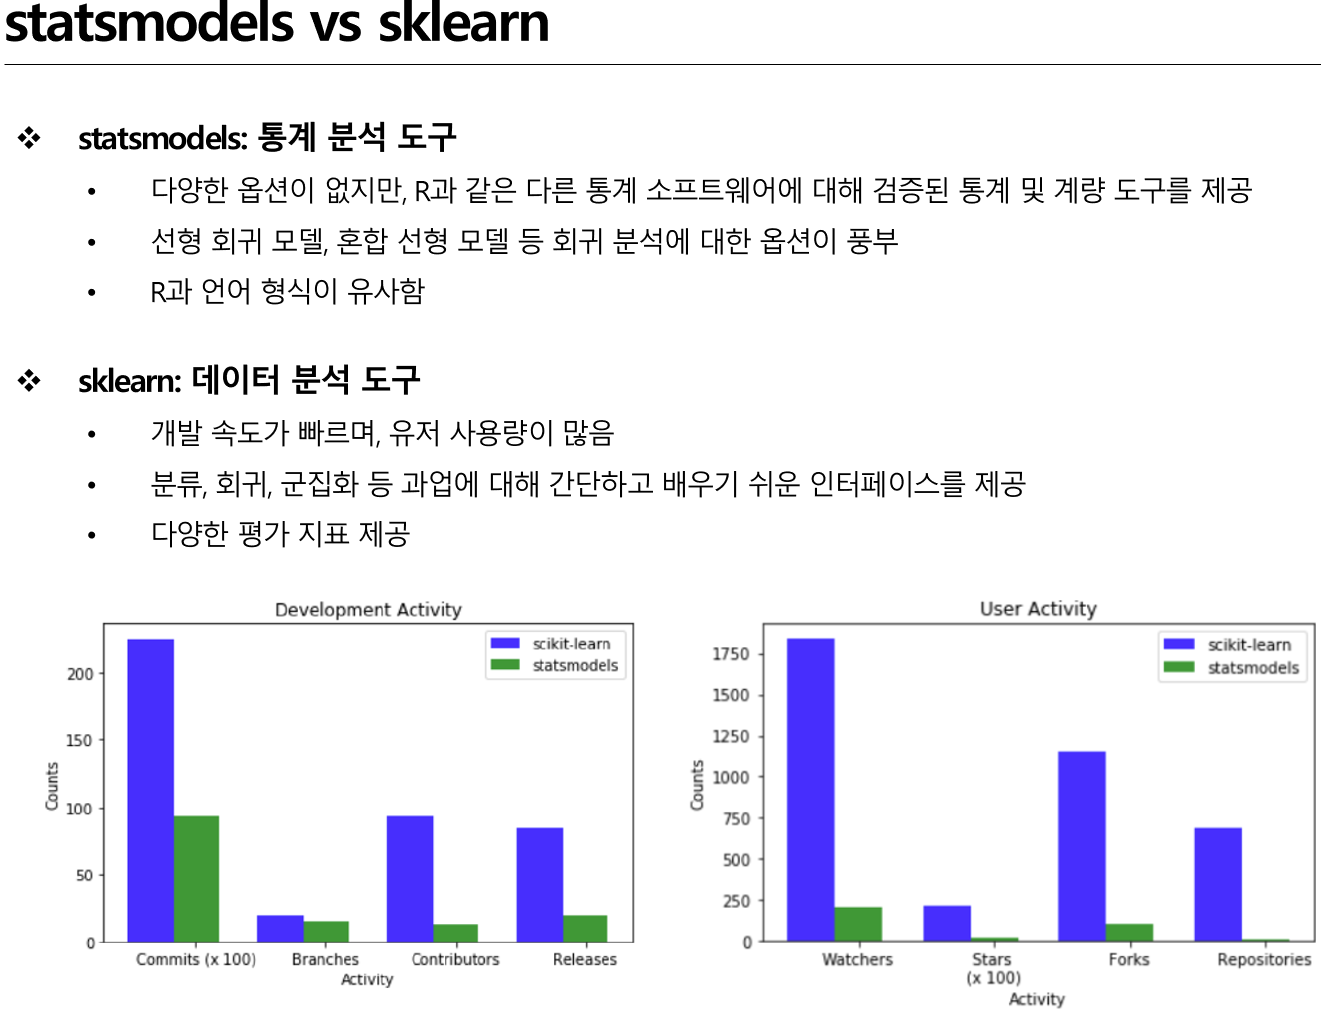

In [48]:
""" 설명 장표 불러오기 """
Image('image/image9.PNG') ### 로컬 사용시
# Image('/content/2024-LGElec-Day2/image/image9.PNG') ### colab 사용시

In [49]:
""" sklearn으로 모델 학습 및 예측 """

"""
fit_intercept=False
 - 기존에 add_constant를 데이터에 해주었기에, intercept를 활용할 필요가 없기 때문
 - default: fit_intercept=True
"""

lr_skl = LinearRegression(fit_intercept=False) ### 모델 초기화
lr_skl.fit(X_train, y_train) ### 모델 학습 (파라미터 계산)
y_pred_skl = lr_skl.predict(X_test) ### 예측

""" statsmodels로 모델 학습 및 예측 """
lr_stat = sm.OLS(y_train, X_train)
lr_stat = lr_stat.fit()
y_pred_stat = lr_stat.predict(X_test)

In [52]:
""" sklearn을 통한 회귀계수 확인"""
lr_skl.coef_

array([[-3.66041113e+01,  4.52665424e-01,  9.87644245e-03,
        -1.32408436e-01,  8.05713455e-01, -3.50755256e-03,
        -4.14385827e-01, -4.28610574e-01]])

In [50]:
""" statsmodels 예측 결과"""
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_stat))
test_r2_stat = r2_score(y_test, y_pred_stat)

print('statsmodels Testing MSE: {:.3f}'.format(test_mse_stat))
print('statsmodels Testing RMSE: {:.3f}'.format(test_rmse_stat))
print('statsmodels Testing MAE: {:.3f}'.format(test_mae_stat))
print('statsmodels Testing MAPE: {:.3f}'.format(test_mape_stat))
print('statsmodels Testing R2: {:.3f}'.format(test_r2_stat))

statsmodels Testing MSE: 0.549
statsmodels Testing RMSE: 0.741
statsmodels Testing MAE: 0.535
statsmodels Testing MAPE: 31.478
statsmodels Testing R2: 0.599


In [51]:
""" sklearn 예측 결과 """
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('sklearn Testing MSE: {:.3f}'.format(test_mse_skl))
print('sklearn Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('sklearn Testing MAE: {:.3f}'.format(test_mae_skl))
print('sklearn Testing MAPE: {:.3f}'.format(test_mape_skl))
print('sklearn Testing R2: {:.3f}'.format(test_r2_skl))

sklearn Testing MSE: 0.549
sklearn Testing RMSE: 0.741
sklearn Testing MAE: 0.535
sklearn Testing MAPE: 31.478
sklearn Testing R2: 0.599


# **EOD**